
## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:



In [147]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [148]:
!ls Data

bom.movie_gross.csv
im.db
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [149]:
bom_mov = pd.read_csv("data/bom.movie_gross.csv")
rt = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
rt_rev = pd.read_table("data/rt.reviews.tsv", encoding= 'latin1')
tmdb = pd.read_csv("data/tmdb.movies.csv")
tn = pd.read_csv("data/tn.movie_budgets.csv")
tn_copy = tn.copy()

conn = sqlite3.connect("Data/im.db")
imdb = pd.read_sql("""
SELECT *
  FROM sqlite_master 
 WHERE type = 'table';
""", conn)

imdb_principals = pd.read_sql("SELECT * FROM principals", conn)
imdb_persons = pd.read_sql("SELECT * FROM persons", conn)
imdb_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)
imdb_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
imdb_movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

In [150]:
fm = pd.merge(tmdb, bom_mov, how = 'inner', on = 'title').copy()

fm['domestic_gross'].dropna(axis = 'index', how = 'any')
fm.dropna(subset = ['domestic_gross'], inplace=True)

fm['foreign_gross'].fillna(0, inplace=True)
fm['foreign_gross'] = pd.to_numeric(fm['foreign_gross'], errors='coerce')

In [151]:
fm['worldwide_gross'] = fm['domestic_gross'] + fm['foreign_gross']

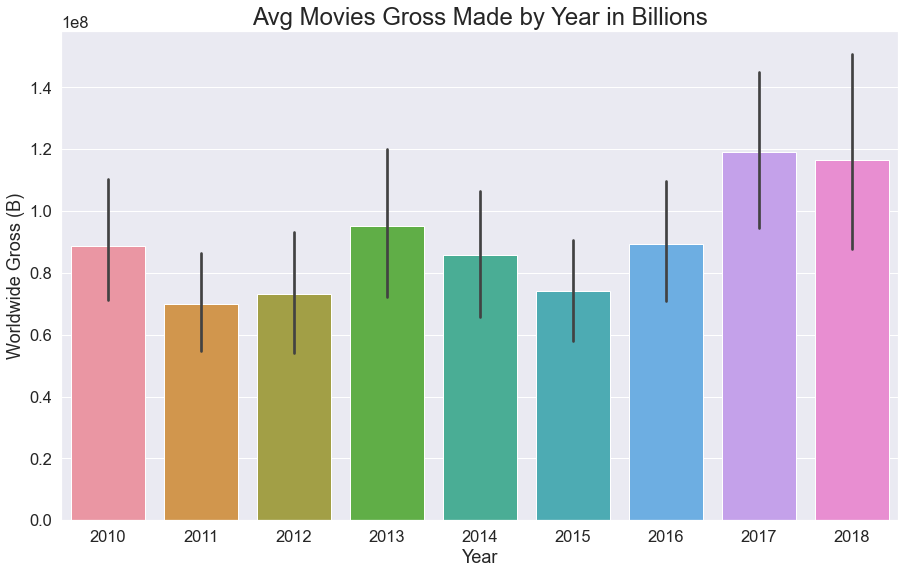

In [152]:
fig, ax = plt.subplots(figsize=(15,9))
sns.set(font_scale=2.0)
sns.set_palette("rocket")
sns.barplot(x = fm['year'], y = fm['worldwide_gross'], ax=ax);

ax.set_xlabel("Year")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Movies Gross Made by Year in Billions")

plt.show()

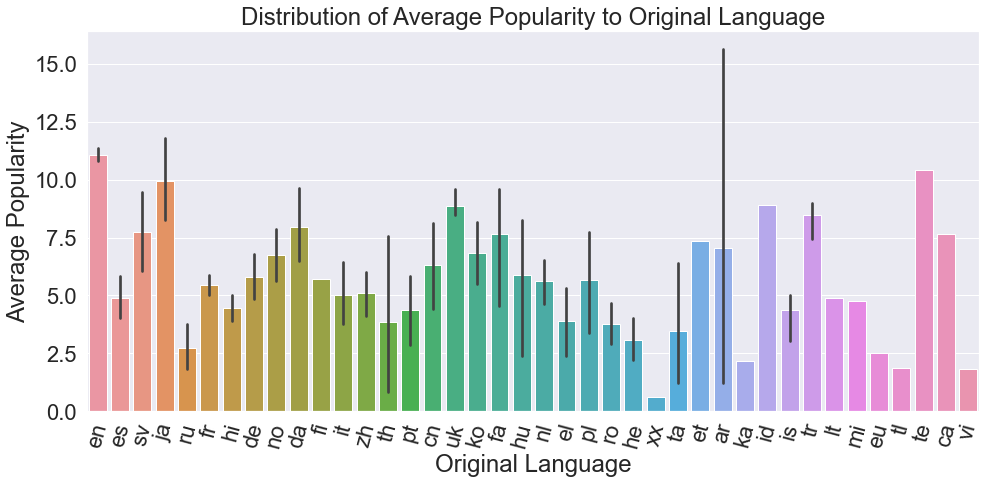

In [153]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x = subset_60p['original_language'], y = subset_60p['popularity'])
fig.subplots_adjust(hspace=0.125, wspace=0.125)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Original Language')
ax.set_ylabel('Average Popularity')
ax.set_title('Distribution of Average Popularity to Original Language');

In [154]:
subset_60p = fm.loc[fm['popularity'] < 60]

lang_bar_df = subset_60p.groupby('original_language').median().sort_values(by = 'popularity', ascending = False).reset_index().head()

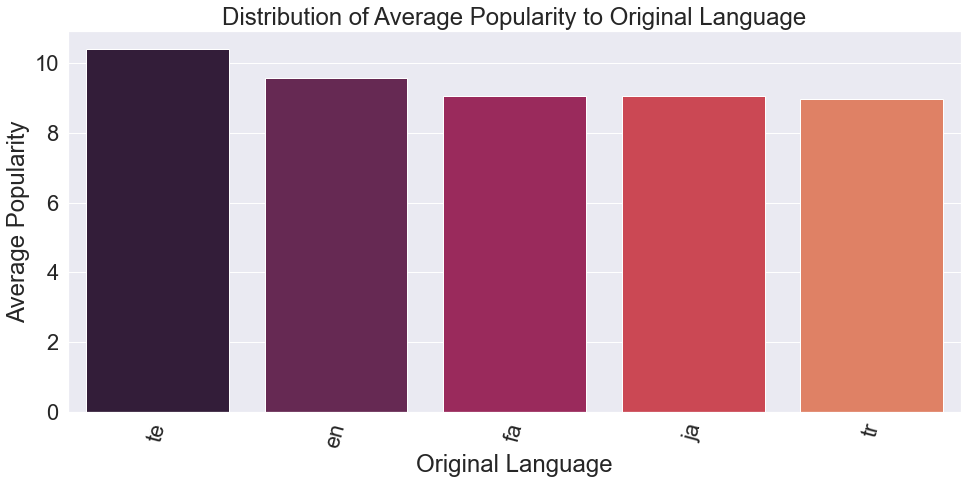

In [155]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x = lang_bar_df['original_language'], y = lang_bar_df['popularity'])
fig.subplots_adjust(hspace=0.125, wspace=0.125)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Original Language')
ax.set_ylabel('Average Popularity')
ax.set_title('Distribution of Average Popularity to Original Language');

In [156]:
subset_300m = fm.loc[fm['worldwide_gross'] >= 300000000]
subset_300m['studio'].unique()

array(['P/DW', 'Par.', 'WB', 'BV', 'Uni.', 'Sum.', 'Fox', 'Wein.', 'FoxS',
       'Sony', 'SGem', 'WB (NL)', 'LGF', 'LG/S', 'FR', 'FUN', 'UTV',
       'WGUSA'], dtype=object)

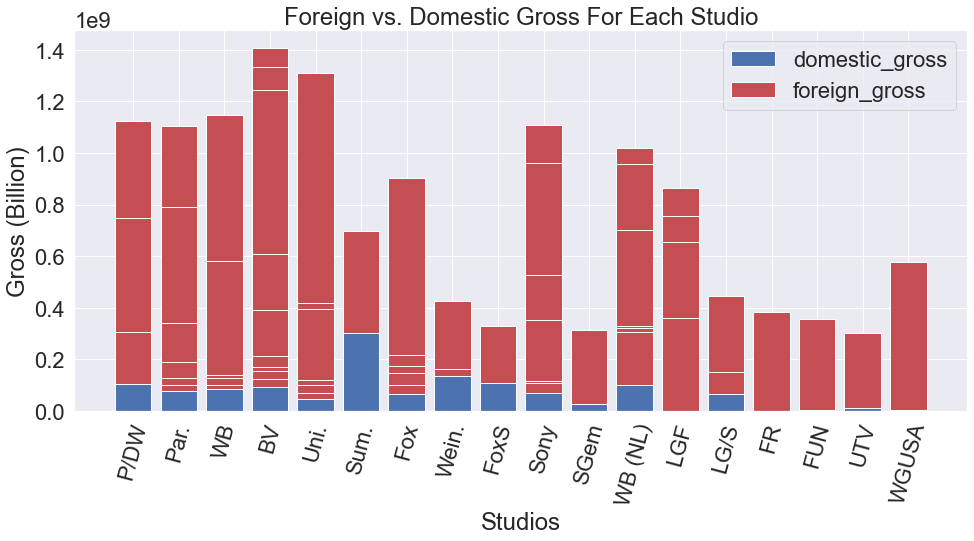

In [157]:
fig, ax = plt.subplots(figsize=(16,7))
ax.bar(x = subset_300m['studio'], height = subset_300m['domestic_gross'], label='domestic_gross', color='b')
ax.bar(x = subset_300m['studio'], height = subset_300m['foreign_gross'], label='foreign_gross', color='r', bottom = subset_300m['domestic_gross'])
ax.legend()
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Studios')
ax.set_ylabel('Gross (Billion)')
ax.set_title('Foreign vs. Domestic Gross For Each Studio');

In [158]:
st = subset_300m['studio']

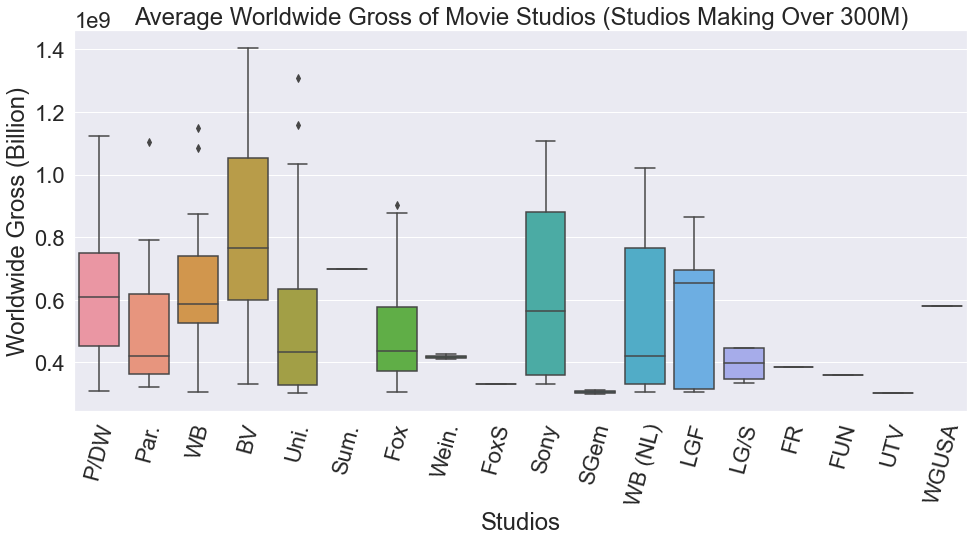

In [159]:
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x = st, y = subset_300m['worldwide_gross'])
sns.set(font_scale=2)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel('Studios')
ax.set_ylabel('Worldwide Gross (Billion)')
ax.set_title('Average Worldwide Gross of Movie Studios (Studios Making Over 300M)');

In [160]:
tn['release_date'] = pd.to_datetime(tn['release_date']).dt.year  # Getting the YEAR from release_date
tn['release_date'] = pd.to_numeric(tn['release_date'])           # Converting to numeric
tn = tn[tn['release_date'] > 1999]                               # Years above 1999

# Cleaning worldwide gross column 
                                                                 # Replacing symbols then to_numeric
tn['worldwide_gross'] = pd.to_numeric(tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['worldwide_gross'] = tn['worldwide_gross'] * 1                # All numbers to positive
tn = tn[(tn['worldwide_gross'] > 100000000) & (tn['worldwide_gross'] < 2000000000)]
                                                                # All worldwide_gross greater than 30000000

# Cleaning production budget column 
                                                                 # Replacing symbols then to_numeric
tn['production_budget'] = pd.to_numeric(tn['production_budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['production_budget'] = tn['production_budget'] * 1            # All numbers to positive
tn = tn[tn['production_budget'] > 0]                             # All production_budget greater than 0

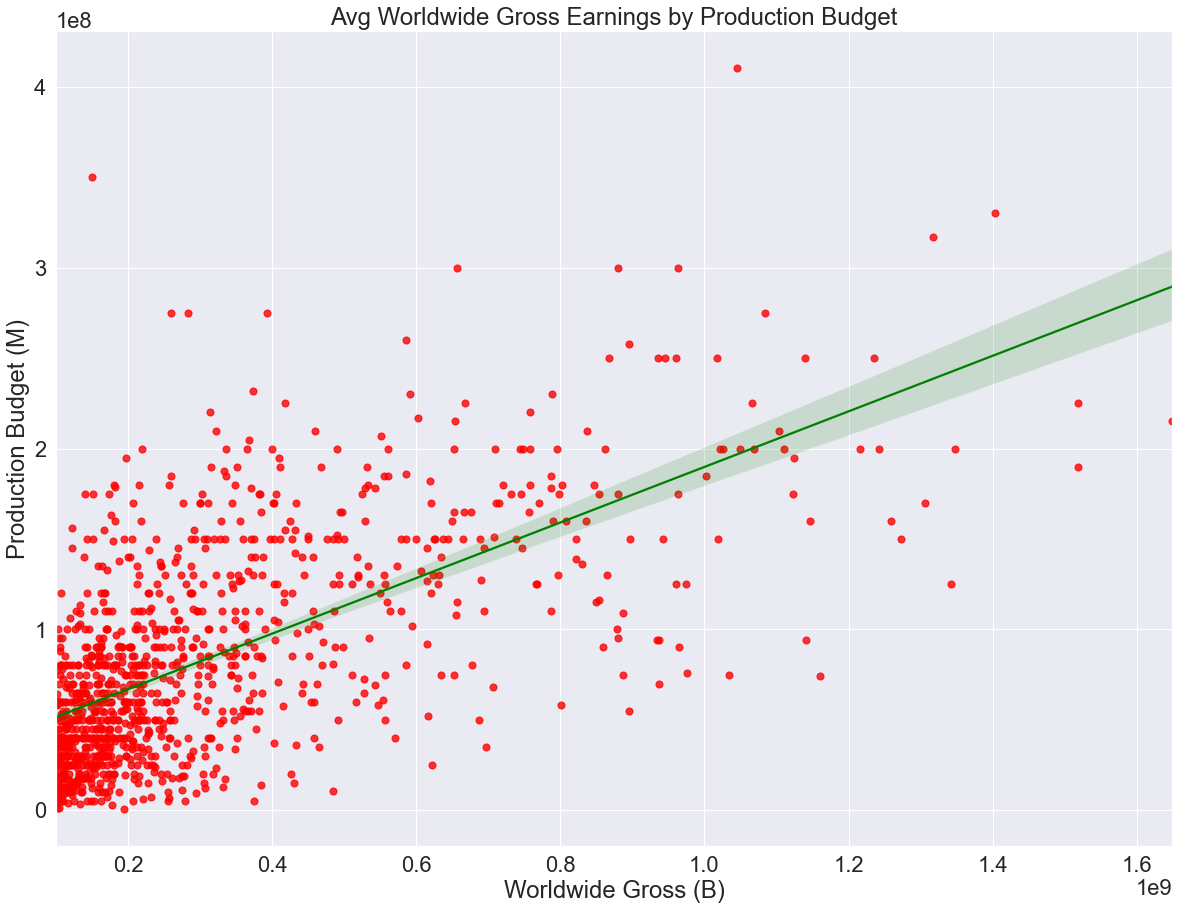

In [161]:
# production_budget / worldwide_gross correlation plot

fig, ax = plt.subplots(figsize=(20,15))
sns.regplot(x = tn['worldwide_gross'], y = tn['production_budget'], scatter=True, color="red", ci=95, scatter_kws={'s':50}, line_kws={'color':'green'})
sns.set(font_scale=2)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Production Budget (M)")
ax.set_title("Avg Worldwide Gross Earnings by Production Budget")

plt.show()

In [162]:
tn_copy['release_date'] = pd.to_datetime(tn_copy['release_date'])
tn_copy['month'] = tn_copy['release_date'].dt.month
tn_copy['worldwide_gross'] = tn_copy['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
monthly_gross = tn_copy.groupby('month')['worldwide_gross'].sum()

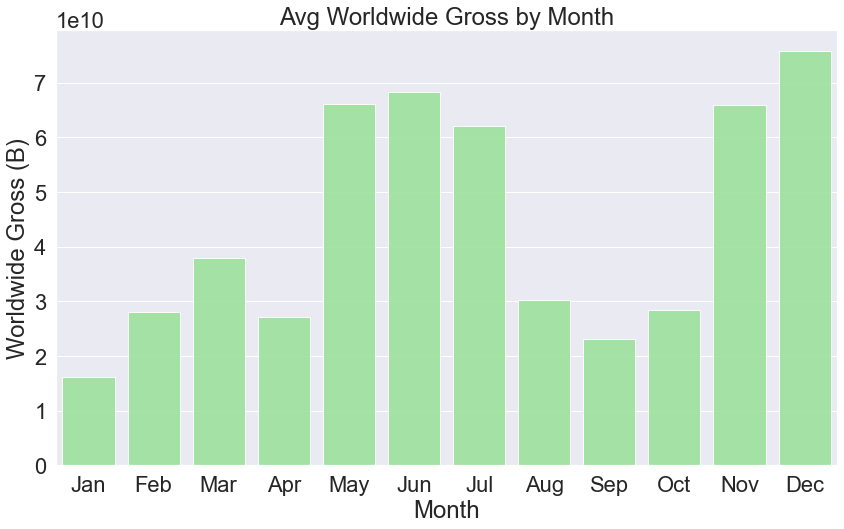

In [163]:
import calendar

x = [calendar.month_abbr[i] for i in monthly_gross.index]
y = monthly_gross.values

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x, y, color="lightgreen", alpha= 0.9)
ax.set_xlabel("Month")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Worldwide Gross by Month")
plt.show()

In [164]:
merged_imdb_people = pd.merge(imdb_principals, imdb_persons, how="inner", on='person_id')

In [165]:
akas_ratings_imdb = pd.merge(imdb_movie_akas, imdb_movie_ratings, how="inner", on='movie_id')
merged_imdb = pd.merge(akas_ratings_imdb, imdb_movie_basics, how="inner", on='movie_id')

In [166]:
genres = merged_imdb["genres"].str.split(",").explode().unique()
genres

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Documentary', 'Romance',
       'Family', 'Fantasy', 'Crime', 'Thriller', 'Comedy', 'Mystery',
       'Musical', 'Animation', 'Horror', 'Sport', 'Music', 'History',
       'Biography', None, 'War', 'News', 'Western', 'Reality-TV',
       'Game-Show', 'Adult'], dtype=object)

In [167]:
rating_genre = merged_imdb[merged_imdb['genres'].isin(genres)].groupby("genres")["averagerating"].mean().sort_values()

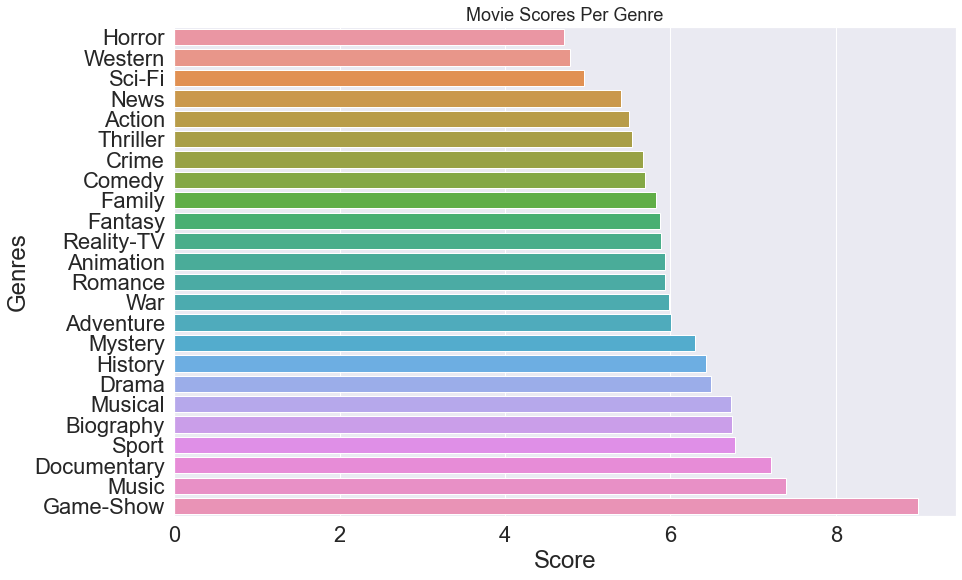

In [168]:
x = rating_genre.values
y = rating_genre.index

fig, ax = plt.subplots(figsize=(14,9))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.barplot(x,y)

ax.set_xlabel("Score")
ax.set_ylabel("Genres")

ax.set_title("Movie Scores Per Genre") 
# ax.tick_params(axis='x', rotation=75)
plt.show()

In [169]:
review_rating = pd.merge(rt_rev, rt, how = 'inner', on = 'id')

In [170]:
review_rating['rating_x'].isnull().sum()

13517

In [171]:
filtered_review_rating = review_rating.dropna(subset = ['rating_x'])
filtered_review_rating = review_rating.dropna(subset = ['rating_y'])

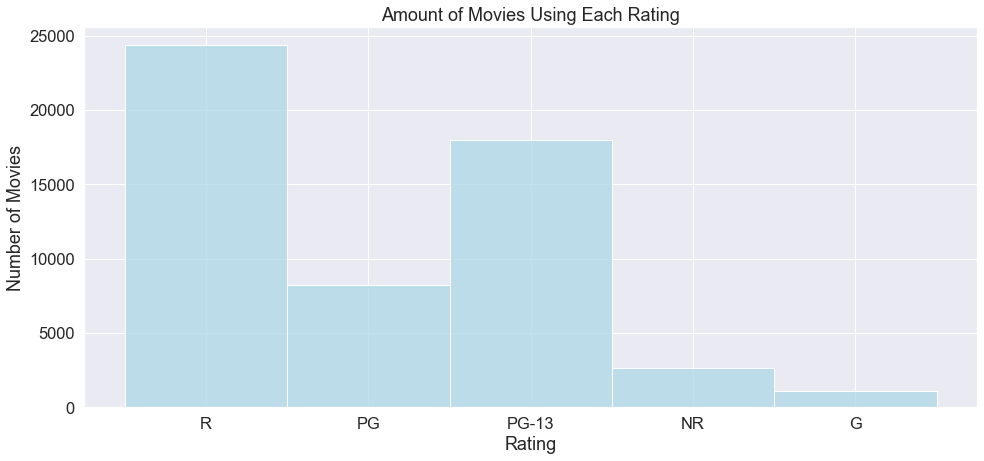

In [172]:
fig, ax = plt.subplots(figsize = (16,7))
sns.histplot(x = filtered_review_rating['rating_y'], color = "lightblue" ) 
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Amount of Movies Using Each Rating');

In [173]:
genre_id = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime',
            99:'Documentary', 18:'Drama', 10751:'Family', 14:'Fantasy', 36:'History',
            27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance',
            878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War',
            37:'Western'}

In [174]:
fm['genre_ids'] = fm['genre_ids'].apply(lambda x: x if not pd.isna(x) else None)

In [175]:
import ast

fm_genres = fm[pd.notnull(fm['genre_ids'])]
fm_genres['genre_ids'] = fm_genres['genre_ids'].apply(lambda x: ast.literal_eval(x))
fm_genres['genre'] = fm_genres['genre_ids'].apply(lambda x: [genre_id[g] for g in x])
fm_genres['genre'] = fm_genres['genre'].apply(lambda x: ', '.join(x))

In [176]:
review_rating.dropna(subset = ['genre'], inplace=True)
review_rating['genre'] = review_rating['genre'].apply(lambda x: str(x.replace('|',',').replace('and',',').replace(' , ',',')))

In [177]:
filtered_rating = review_rating.drop_duplicates(subset='synopsis')
filtered_rating = filtered_rating.dropna(subset=['rating_y'])

In [178]:
filtered_fm_genres = fm_genres.drop_duplicates(subset='title')

In [179]:
del merged_imdb["title"]
filtered_imdb = merged_imdb.drop_duplicates(subset='original_title')
filtered_imdb.rename(columns = {'original_title': 'title'}, inplace=True)

In [180]:
fm_genres_imdb = pd.merge(fm_genres, filtered_imdb, how="inner", on=['title'])

In [181]:
all_genres = fm_genres_imdb["genres"].str.split(",").explode().unique()
all_genres

array(['Action', 'Adventure', 'Animation', 'Sci-Fi', 'Comedy', 'Family',
       'Thriller', 'Drama', 'Fantasy', 'Mystery', 'Biography', 'History',
       'Romance', 'Crime', 'Horror', 'Western', 'War', 'Sport',
       'Documentary', 'Music', 'Musical', 'News'], dtype=object)

In [182]:
genre_gross = fm_genres_imdb[fm_genres_imdb['genres'].isin(all_genres)].groupby("genres")["worldwide_gross", "runtime_minutes"].mean().sort_values(by=['worldwide_gross', 'runtime_minutes'])
genre_gross.dropna(inplace=True)

genre_gross["runtime_minutes"] = genre_gross["runtime_minutes"].round(1)
genre_gross["worldwide_gross"] = genre_gross["worldwide_gross"].round()
genre_gross

,worldwide_gross,runtime_minutes
genres,,
Fantasy,1546000.0,81.0
Documentary,12233091.0,87.4
Drama,18332187.0,106.0
Action,38267936.0,112.1
Thriller,38499236.0,90.7
Crime,65469367.0,112.3
Comedy,68172363.0,97.7
Horror,79385458.0,88.8
Animation,271951099.0,86.0


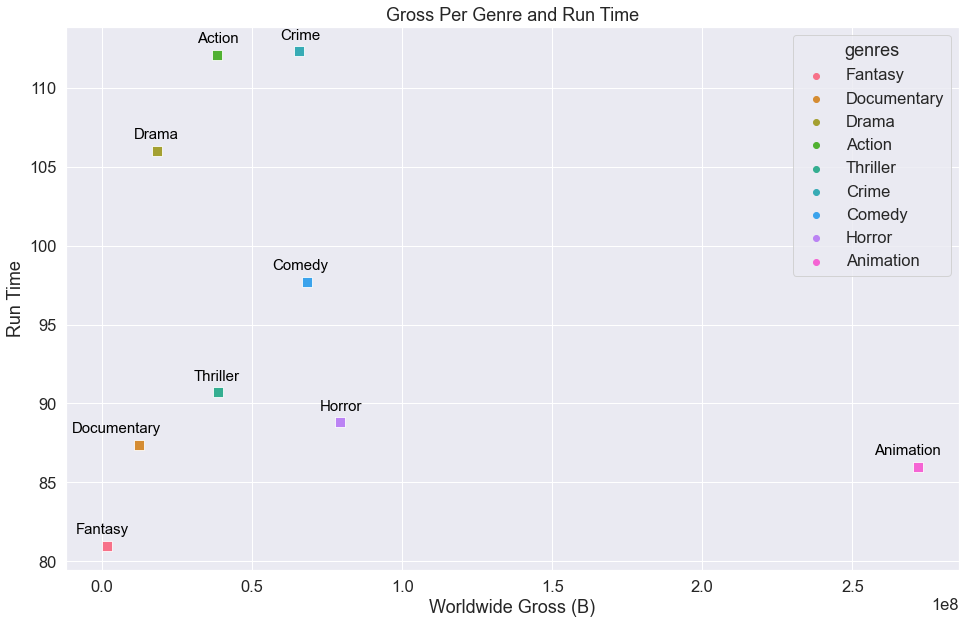

In [183]:
x1 = genre_gross["worldwide_gross"]
y2 = genre_gross["runtime_minutes"]

fig, ax = plt.subplots(figsize=(16,10))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.scatterplot(x=x1, y=y2, hue=genre_gross.index,  marker='s', color='red', s=100)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Run Time")
ax.set_title("Gross Per Genre and Run Time")

for genre in genre_gross.index:
    genre_abbr = genre
    x = genre_gross.loc[genre, "worldwide_gross"]
    y = genre_gross.loc[genre, "runtime_minutes"]
    ax.annotate(genre_abbr, xy=(x, y), xytext=(22, 12), textcoords='offset points', ha='right', fontsize=15, color='black')

plt.show()

In [184]:
rating = rt.dropna(axis=0, subset=['theater_date'])

In [185]:
rating['runtime'] = rating['runtime'].apply(lambda x: int(x.replace('minutes',''))if isinstance(x, str) else x)

In [186]:
mean_runtime = rating['runtime'].mean()

In [187]:
rating['runtime'].fillna(value=mean_runtime, inplace=True)
subset_2000 = rating[rating.theater_date.str[-4:].astype(int)>=2010]
year = subset_2000.theater_date.str.split(",").str[1].tolist()
year = [int(i) for i in year]

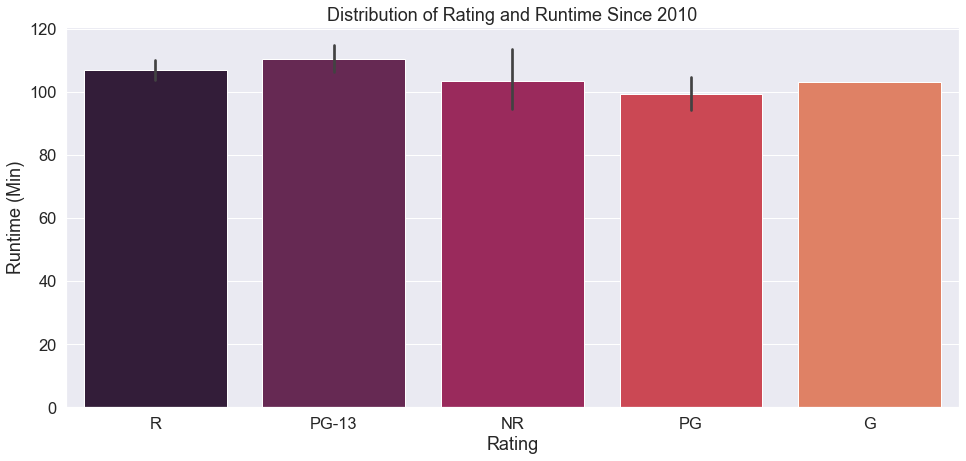

In [188]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x = subset_2000['rating'], y = subset_2000['runtime'])
ax.set_xlabel('Rating')
ax.set_ylabel('Runtime (Min)')
ax.set_title('Distribution of Rating and Runtime Since 2010');

In [189]:
run_rate = pd.merge(imdb_movie_basics, imdb_movie_ratings, how = 'inner', on = 'movie_id')

In [190]:
run_rate.sort_values(by=['runtime_minutes'], ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,6.2,69
15171,tt2008009,The Clock,The Clock,2010,1440.0,Drama,8.9,219
71441,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5
72424,tt9047474,La flor,La flor,2018,808.0,"Drama,Fantasy,Musical",8.5,100
...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [191]:
mean_run = run_rate['runtime_minutes'].mean()

In [192]:
run_rate['runtime_minutes'].fillna(value=mean_run, inplace=True)

In [193]:
subset_run = run_rate.loc[run_rate['runtime_minutes'] < 200]
subset_run

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,94.65404,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,94.65404,None,6.6,5


In [194]:
runt = subset_run['runtime_minutes']
ar = subset_run['averagerating']

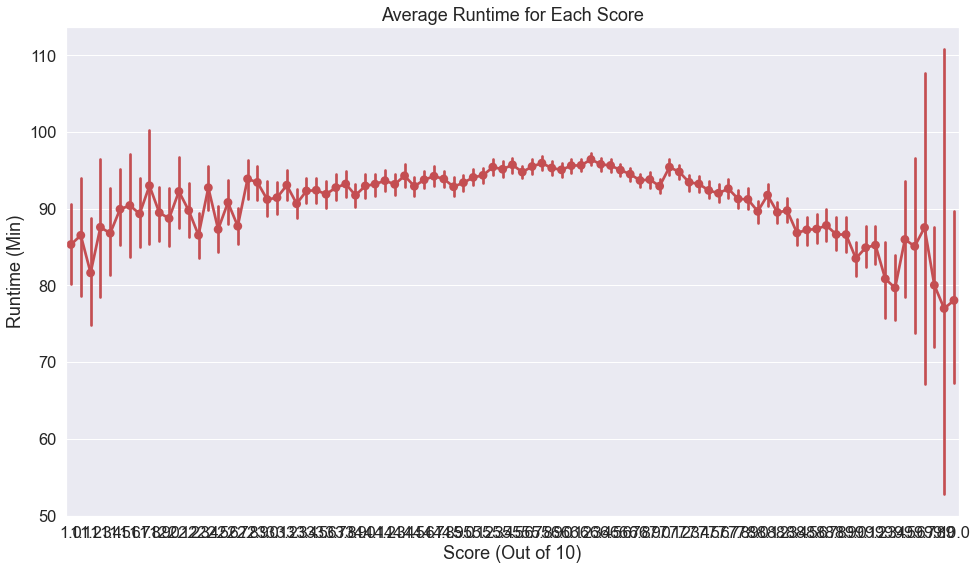

In [195]:
fig, ax = plt.subplots(figsize=(16,9))
sns.pointplot(x = ar, y = runt, color = 'r')
ax.set_xlabel('Score (Out of 10)')
ax.set_ylabel('Runtime (Min)')
ax.set_title('Average Runtime for Each Score');